In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('cinnamon_dataset.csv')
print(df.head(10))

  Sample_ID  Moisture (%)  Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
0      H001         10.56     5.93              1.24                    0.28   
1      H002         11.43     5.60              1.35                    0.25   
2      H003         11.10     5.70              1.21                    0.37   
3      H004         10.90     5.76              1.47                    0.27   
4      H005         10.23     5.82              1.28                    0.26   
5      H006         10.23     6.05              1.40                    0.31   
6      H007         10.09     5.64              1.29                    0.23   
7      H008         11.30     5.86              1.36                    0.36   
8      H009         10.90     5.91              1.36                    0.21   
9      H010         11.06     5.53              1.26                    0.40   

   Chromium (mg/kg)  Coumarin (mg/kg) Quality_Label  
0            0.0019            0.0021          High  
1          

In [ ]:
print(df.describe())

       Moisture (%)    Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
count     60.000000  60.000000         60.000000               60.000000   
mean      11.883500   6.514500          1.050833                0.450500   
std        1.171428   0.637124          0.272585                0.161816   
min       10.030000   5.530000          0.610000                0.200000   
25%       11.047500   5.967500          0.777500                0.347500   
50%       11.635000   6.395000          1.090000                0.430000   
75%       12.657500   7.160000          1.260000                0.557500   
max       13.930000   7.490000          1.490000                0.790000   

       Chromium (mg/kg)  Coumarin (mg/kg)  
count         60.000000         60.000000  
mean           0.002188          0.008837  
std            0.000739          0.004963  
min            0.001000          0.002100  
25%            0.001600          0.004400  
50%            0.002050          0.008450  
75%    

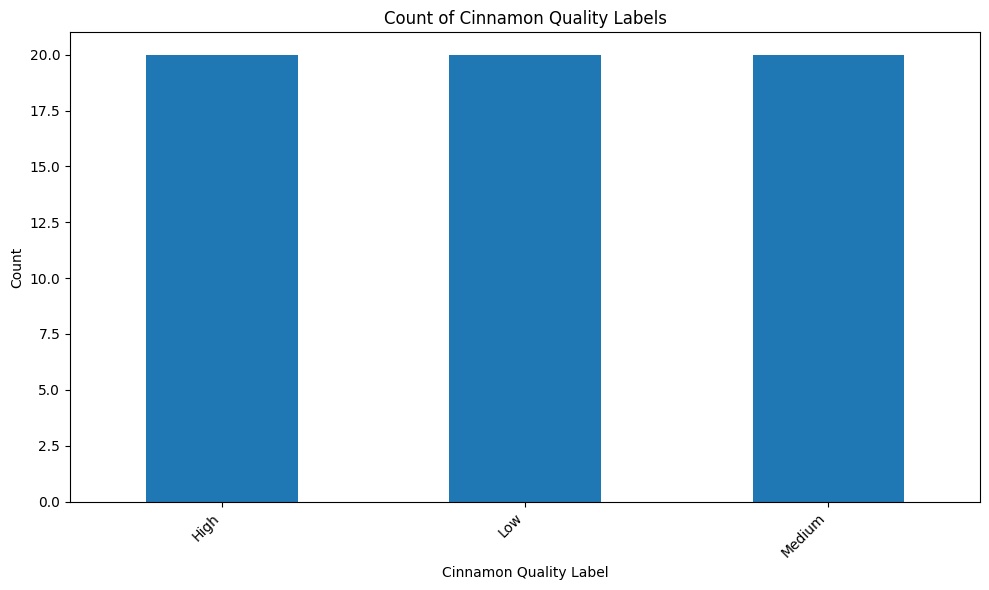

In [ ]:
# Generate a bar chart
plt.figure(figsize=(10, 6))
df['Quality_Label'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Cinnamon Quality Labels')
plt.xlabel('Cinnamon Quality Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Define features (X) and target (y)
X = df.drop(["Quality_Label", "Sample_ID"], axis=1)
y = df['Quality_Label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (36, 6)
Shape of X_test: (24, 6)
Shape of y_train: (36,)
Shape of y_test: (24,)


In [ ]:
print(X.head())

   Moisture (%)  Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
0         10.56     5.93              1.24                    0.28   
1         11.43     5.60              1.35                    0.25   
2         11.10     5.70              1.21                    0.37   
3         10.90     5.76              1.47                    0.27   
4         10.23     5.82              1.28                    0.26   

   Chromium (mg/kg)  Coumarin (mg/kg)  
0            0.0019            0.0021  
1            0.0016            0.0039  
2            0.0013            0.0029  
3            0.0011            0.0035  
4            0.0013            0.0047  


In [ ]:
# Create a decision tree classifier
clf = tree.DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 1.0


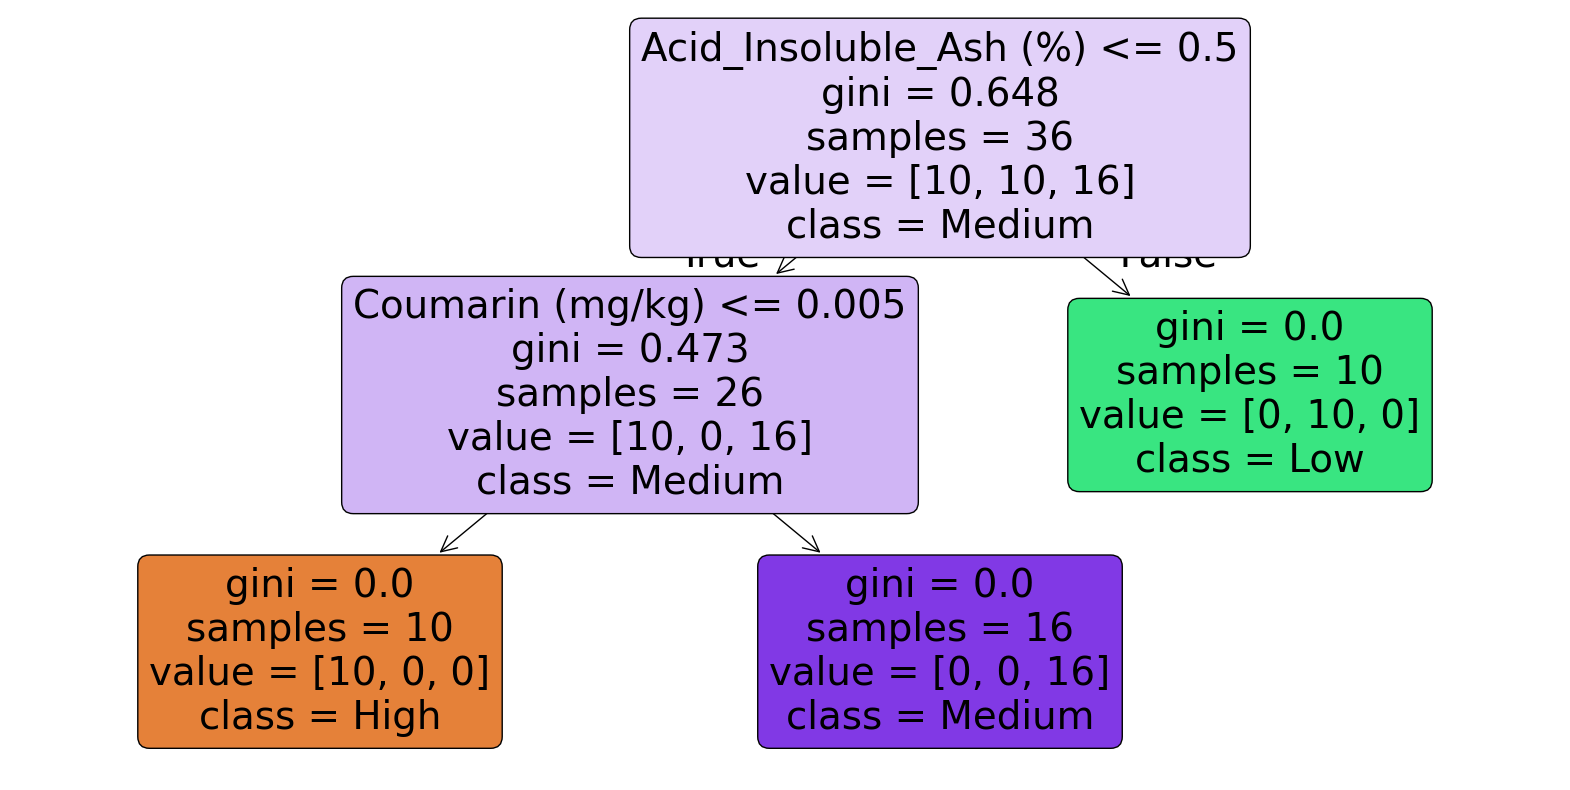

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model (you'll typically want to add evaluation metrics here)
# For example, accuracy:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# You can also visualize the tree (optional, but helpful for understanding)
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in clf.classes_], filled=True, rounded=True)
plt.show()

In [ ]:
# Generate a randomized sample for testing
# The shape of the randomized sample should match the number of features in X
# The values should be within a reasonable range for each feature based on the training data
randomized_sample = pd.DataFrame(columns=X.columns)

for col in X.columns:
  # For numerical features, generate values within the min/max range observed in X_train
  if X_train[col].dtype in ['int64', 'float64']:
    min_val = X_train[col].min()
    max_val = X_train[col].max()
    randomized_sample[col] = np.random.uniform(min_val, max_val, size=1)
  # For categorical features (if any), randomly pick one of the unique values
  elif X_train[col].dtype == 'object': # Assuming categorical features are objects
    unique_values = X_train[col].unique()
    randomized_sample[col] = np.random.choice(unique_values, size=1)

print("\nRandomized Sample X feature to be tested:")
randomized_sample


Randomized Sample X feature to be tested:


,Moisture (%),Ash (%),Volatile_Oil (%),Acid_Insoluble_Ash (%),Chromium (mg/kg),Coumarin (mg/kg)
0,12.171229,6.843436,0.776597,0.439549,0.003525,0.007177


In [ ]:
randomized_prediction = clf.predict(randomized_sample)
print(f"\nPredicted quality for the randomized sample: {randomized_prediction}")


Predicted quality for the randomized sample: ['Medium']


In [ ]:
# Predict the probability for each class
probabilities = clf.predict_proba(randomized_sample)

print(f"\nPrediction probabilities for each class:\n {probabilities}")

# Get the confidence (probability of the predicted class)
confidence = np.max(probabilities) * 100

print(f"\nConfidence of the prediction: {confidence}")


Prediction probabilities for each class:
 [[0. 0. 1.]]

Confidence of the prediction: 100.0


In [ ]:
# prompt: Import the model using pickle

import pickle

# Save the trained model to a file
filename = 'cinnamon.pkl'
pickle.dump(clf, open(filename, 'wb'))

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

Sample Creation

In [ ]:
custom_sample_hardcoded = pd.DataFrame({
    'Moisture (%)': [0.123],
    'Ash (%)': [0.7556],
    'Volatile_Oil (%)': [0.5],
    'Acid_Insoluble_Ash (%)': [0.50],
    'Chromium (mg/kg)': [0.256],
    'Coumarin (mg/kg)': [0.00002],
})

print("\nCustom Sample (Hardcoded):")
print(custom_sample_hardcoded)


Custom Sample (Hardcoded):
   Moisture (%)  Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
0         0.123   0.7556               0.5                     0.5   

   Chromium (mg/kg)  Coumarin (mg/kg)  
0             0.256           0.00002  


In [ ]:
cinnamon_model = pickle.load(open("cinnamon.pkl", "rb"))
predict = cinnamon_model.predict(custom_sample_hardcoded)

# Predict the probability for each class
probabilities = clf.predict_proba(custom_sample_hardcoded)

# Get the confidence (probability of the predicted class)
confidence = np.max(probabilities) * 100

print(f"\nConfidence of the prediction: {confidence}")
print(predict)


Confidence of the prediction: 100.0
['Low']
